In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
#Let us create a Dataframe for evaluating accuracy of prediction

In [5]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Mean Squared Error (MSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

In [6]:
#Fuction for calculating R 2

In [7]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [8]:
#Let us perform a simple regression first

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [10]:
train_data,test_data = train_test_split(df,test_size = 0.2,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)

In [11]:
msesm =format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrsm = format(lr.score(X_train, y_train),'.3f')
rtesm = format(lr.score(X_test, y_test),'.3f')

In [12]:
print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

Average Price for Test Data: 539744.130
Intercept: -47235.811302901246
Coefficient: [282.2468152]


In [13]:
evaluation.loc[0] = ['Simple Model','-',msesm,rtrsm,'-',rtesm,'-']
evaluation

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Simple Model,-,254289.149,0.492,-,0.496,-


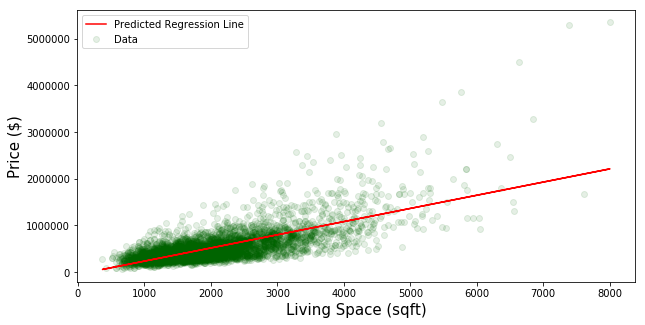

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.legend()
plt.show()

In [15]:
#Let us now try multiple regression

In [16]:
#Let us first see how features are related to each other

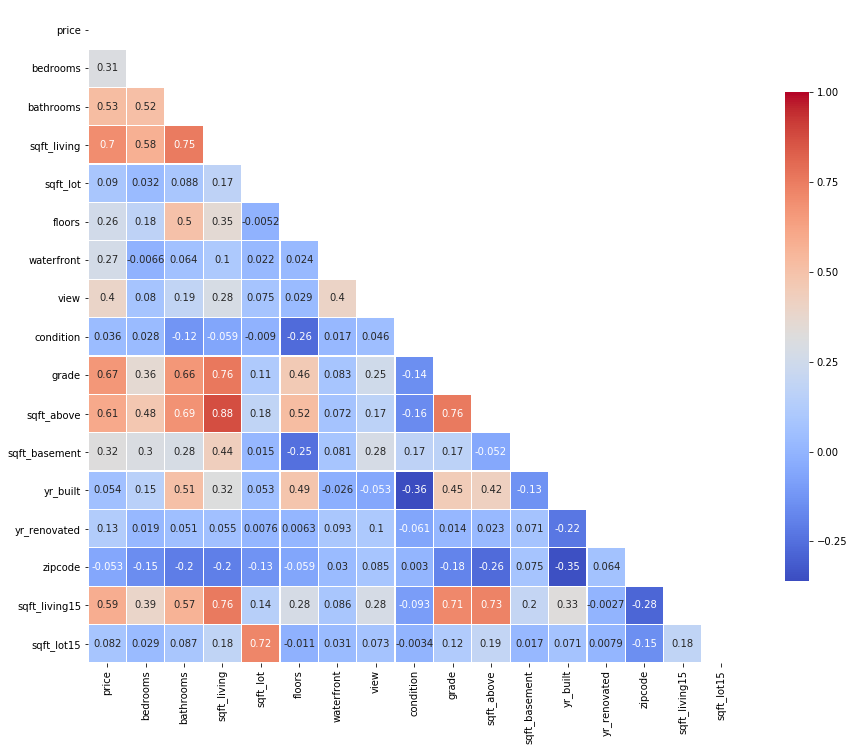

In [17]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
            'waterfront','view','condition','grade','sqft_above','sqft_basement',
            'yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=1.0,square=True,cmap="coolwarm", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75});

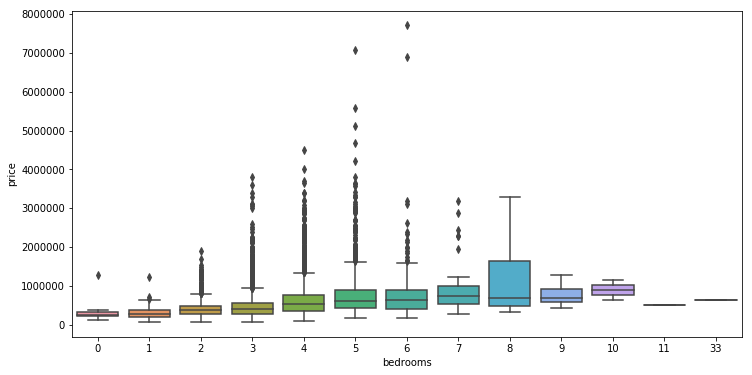

In [18]:
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'])

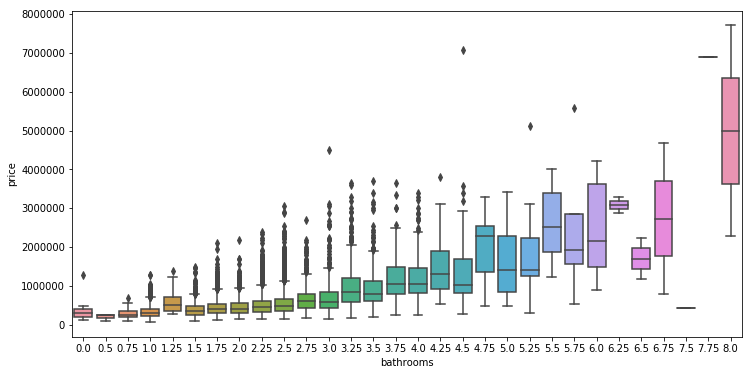

In [19]:
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])

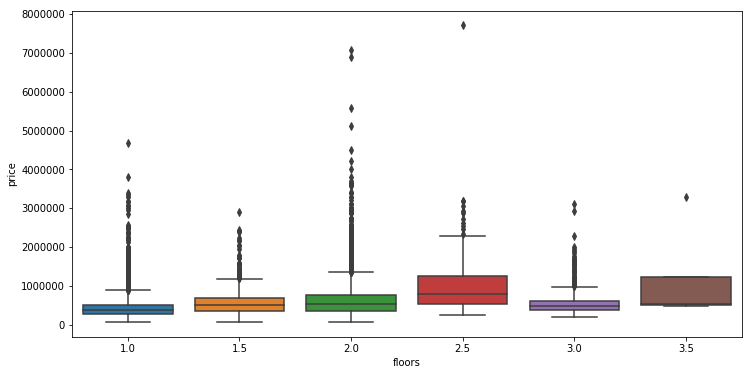

In [20]:
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=train_data['floors'],y=train_data['price'])

In [21]:
#Let us visualize in 3d!

In [22]:
from mpl_toolkits.mplot3d import Axes3D

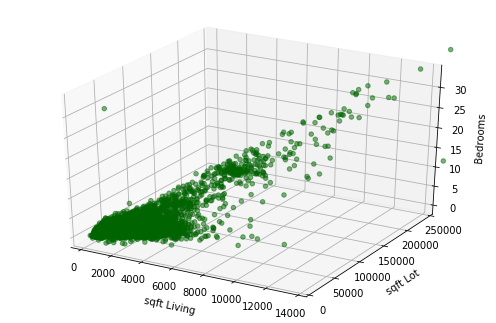

In [23]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(train_data['sqft_living'],train_data['sqft_lot'],train_data['bedrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

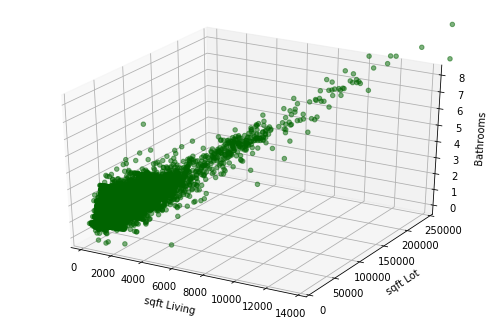

In [24]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(train_data['sqft_living'],train_data['sqft_lot'],train_data['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bathrooms')
ax.set(ylim=[0,250000]);

In [25]:
#Choosing features randomly based on corrplot

In [26]:
features1 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_living15','sqft_above']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features1],train_data['price'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

Intercept: 4697.69784774119
Coefficients: [-5.59396329e+04  1.71002713e+02  3.17996944e+02 -3.31244239e-01
  1.79478180e+04  7.03193338e+01 -5.56572712e+01]


In [28]:
pred1 = complex_model_1.predict(test_data[features1])
msecm1 = format(np.sqrt(metrics.mean_squared_error(y_test,pred1)),'.3f')
rtrcm1 = format(complex_model_1.score(train_data[features1],train_data['price']),'.3f')
artrcm1 = format(adjustedR2(float(rtrcm1),train_data.shape[0],len(features1)),'.3f')

rtecm1 = format(complex_model_1.score(test_data[features1],test_data['price']),'.3f')
artecm1 = format(adjustedR2(float(rtecm1),test_data.shape[0],len(features1)),'.3f')

evaluation.loc[1] = ['Complex Model-1','-',msecm1,rtrcm1,artrcm1,rtecm1,artecm1]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
1,Complex Model-1,-,247862.890,0.515,0.515,0.521,0.520
0,Simple Model,-,254289.149,0.492,-,0.496,-


In [29]:
#We can see that the R squared has increased and MSE has decreased as well

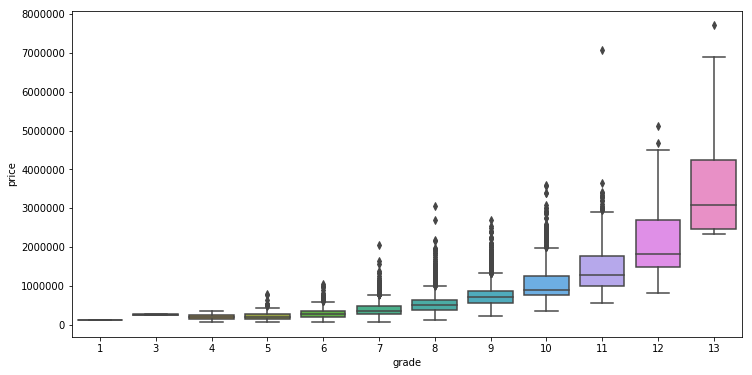

In [30]:
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=train_data['grade'],y=train_data['price'])

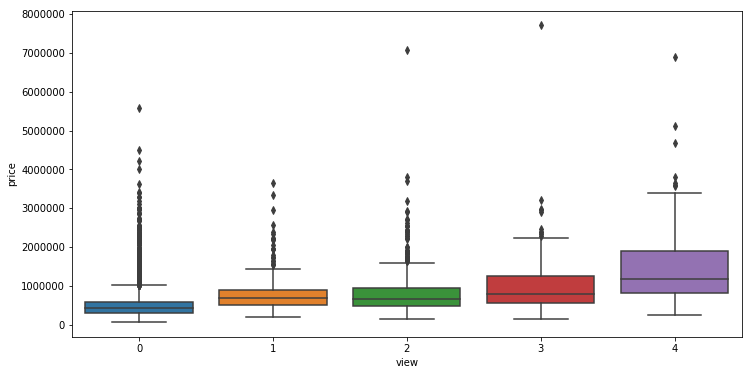

In [31]:
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=train_data['view'],y=train_data['price'])

In [32]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features2],train_data['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred2 = complex_model_2.predict(test_data[features2])
msecm2 = format(np.sqrt(metrics.mean_squared_error(y_test,pred2)),'.3f')
rtrcm2 = format(complex_model_2.score(train_data[features2],train_data['price']),'.3f')
artrcm2 = format(adjustedR2(float(rtrcm2),train_data.shape[0],len(features2)),'.3f')
rtecm2 = format(complex_model_2.score(test_data[features2],test_data['price']),'.3f')
artecm2 = format(adjustedR2(float(rtecm2),test_data.shape[0],len(features2)),'.3f')


evaluation.loc[2] = ['Complex Model-2','-',msecm2,rtrcm2,artrcm2,rtecm2,artecm2]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

Intercept: 13559209.611224025
Coefficients: [-3.80981692e+04  5.03031727e+04  1.71370475e+02 -2.68019419e-01
  2.21944912e+04  5.53865017e+05  4.70338164e+04  1.23642184e+05
 -3.88306990e+03 -6.82180496e+01]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
2,Complex Model-2,-,210486.689,0.651,0.651,0.655,0.654
1,Complex Model-1,-,247862.890,0.515,0.515,0.521,0.520
0,Simple Model,-,254289.149,0.492,-,0.496,-


In [33]:
#Let us try random forest feature ranking

In [34]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [35]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [36]:
df_t = df.drop(['price'], axis=1)

In [37]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(df.iloc[:,3:],df['price'])
ranks["RF"] = ranking(rf.feature_importances_, df_t.columns);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished


In [38]:
# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(df.iloc[:,3:],df['price'])
ranks['Ridge'] = ranking(np.abs(ridge.coef_), df_t.columns)

In [39]:
# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(df.iloc[:,3:],df['price'])
ranks["Lasso"] = ranking(np.abs(lasso.coef_), df_t.columns)

In [40]:
pd.DataFrame(ranks).sort_values('RF', ascending = False)

,RF,Ridge,Lasso
view,1.00,0.16,0.16
bedrooms,0.86,0.00,0.00
yr_renovated,0.50,1.00,1.00
zipcode,0.21,0.35,0.36
sqft_lot,0.10,0.94,0.97
lat,0.09,0.00,0.00
sqft_above,0.07,0.00,0.00
condition,0.06,0.00,0.00
long,0.04,0.00,0.00
yr_built,0.04,0.00,0.00


In [41]:
#Let us build the model using above values

In [42]:
features3 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode','lat','condition']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data[features3],train_data['price'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred3 = complex_model_3.predict(test_data[features3])
msecm3 = format(np.sqrt(metrics.mean_squared_error(y_test,pred3)),'.3f')
rtrcm3 = format(complex_model_3.score(train_data[features3],train_data['price']),'.3f')
artrcm3 = format(adjustedR2(float(rtrcm2),train_data.shape[0],len(features3)),'.3f')
rtecm3 = format(complex_model_3.score(test_data[features3],test_data['price']),'.3f')
artecm3 = format(adjustedR2(float(rtecm2),test_data.shape[0],len(features3)),'.3f')


evaluation.loc[3] = ['Complex Model-3','-',msecm3,rtrcm3,artrcm3,rtecm3,artecm3]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

Intercept: 16971414.861961894
Coefficients: [-3.46895272e+04  4.34775677e+04  1.73110975e+02 -1.28885066e-01
  1.87833281e+04  5.69966095e+05  5.43695715e+04  1.05833306e+05
 -3.10553735e+03 -4.01468467e+02  5.84630522e+05  2.11484874e+04]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
3,Complex Model-3,-,195547.776,0.693,0.651,0.702,0.654
2,Complex Model-2,-,210486.689,0.651,0.651,0.655,0.654
1,Complex Model-1,-,247862.890,0.515,0.515,0.521,0.520
0,Simple Model,-,254289.149,0.492,-,0.496,-


In [43]:
#Let us try polynomial regression

In [44]:
#Let us try degree 2 

In [45]:
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(train_data[features3])
X_testpoly = polyfeat.fit_transform(test_data[features3])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly1 = format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f')
rtrpoly1 = format(poly.score(X_trainpoly,train_data['price']),'.3f')
artrpoly1 = format(adjustedR2(float(rtrpoly1),train_data.shape[0],len(features3)),'.3f')

rtepoly1 = format(poly.score(X_testpoly,test_data['price']),'.3f')
artepoly1 = format(adjustedR2(float(rtepoly1),test_data.shape[0],len(features3)),'.3f')

In [46]:
evaluation.loc[4] = ['Polynomial Regression','degree=2',msepoly1,rtrpoly1,artrpoly1,rtepoly1,artepoly1]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
4,Polynomial Regression,degree=2,254289.149,0.793,0.793,0.790,0.789
3,Complex Model-3,-,195547.776,0.693,0.651,0.702,0.654
2,Complex Model-2,-,210486.689,0.651,0.651,0.655,0.654
1,Complex Model-1,-,247862.890,0.515,0.515,0.521,0.520
0,Simple Model,-,254289.149,0.492,-,0.496,-


In [47]:
#We can see the that the R2 squared value has increased but also the MSE has increased!

In [48]:
#Let us try degree 3 

In [49]:
polyfeat = PolynomialFeatures(degree=3)
X_trainpoly = polyfeat.fit_transform(train_data[features3])
X_testpoly = polyfeat.fit_transform(test_data[features3])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly1 = format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f')
rtrpoly1 = format(poly.score(X_trainpoly,train_data['price']),'.3f')
artrpoly1 = format(adjustedR2(float(rtrpoly1),train_data.shape[0],len(features3)),'.3f')

rtepoly1 = format(poly.score(X_testpoly,test_data['price']),'.3f')
artepoly1 = format(adjustedR2(float(rtepoly1),test_data.shape[0],len(features3)),'.3f')

In [50]:
evaluation.loc[5] = ['Polynomial Regression','degree=3',msepoly1,rtrpoly1,artrpoly1,rtepoly1,artepoly1]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
4,Polynomial Regression,degree=2,254289.149,0.793,0.793,0.790,0.789
5,Polynomial Regression,degree=3,254289.149,0.807,0.807,0.741,0.740
3,Complex Model-3,-,195547.776,0.693,0.651,0.702,0.654
2,Complex Model-2,-,210486.689,0.651,0.651,0.655,0.654
1,Complex Model-1,-,247862.890,0.515,0.515,0.521,0.520
0,Simple Model,-,254289.149,0.492,-,0.496,-


In [51]:
#Let us try knn regression too

In [52]:
knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data[features2],train_data['price'])
pred = knnreg.predict(test_data[features2])

mseknn1 = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrknn1 = format(knnreg.score(train_data[features2],train_data['price']),'.3f')
artrknn1 = format(adjustedR2(knnreg.score(train_data[features2],train_data['price']),train_data.shape[0],len(features2)),'.3f')
rteknn1 = format(knnreg.score(test_data[features2],test_data['price']),'.3f')
arteknn1 = format(adjustedR2(knnreg.score(test_data[features2],test_data['price']),test_data.shape[0],len(features2)),'.3f')

knnreg = KNeighborsRegressor(n_neighbors=25)
knnreg.fit(train_data[features2],train_data['price'])
pred = knnreg.predict(test_data[features2])

evaluation.loc[6] = ['KNN Regression','k=15',mseknn1,rtrknn1,artrknn1,rteknn1,arteknn1]
evaluation.sort_values(by = 'Mean Squared Error (MSE)', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Simple Model,-,254289.149,0.492,-,0.496,-
4,Polynomial Regression,degree=2,254289.149,0.793,0.793,0.790,0.789
5,Polynomial Regression,degree=3,254289.149,0.807,0.807,0.741,0.740
6,KNN Regression,k=15,248268.461,0.580,0.580,0.520,0.519
1,Complex Model-1,-,247862.890,0.515,0.515,0.521,0.520
2,Complex Model-2,-,210486.689,0.651,0.651,0.655,0.654
3,Complex Model-3,-,195547.776,0.693,0.651,0.702,0.654


In [53]:
#Let us try advanced techniques

In [54]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [55]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data.iloc[:,3:].values)
    rmse= np.sqrt(-cross_val_score(model, train_data.iloc[:,3:].values, train_data['price'], scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [56]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1)) 

In [58]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [59]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [60]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [61]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [62]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 203729.0303 (9704.4182)



In [63]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 203728.4658 (9709.8367)



In [64]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 118658.9591 (10730.6963)



In [65]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 122330.9261 (5063.7417)



In [67]:
#We can see we have reduced the MSE by almost half by using the gradient boosting technique 

In [68]:
#Hence we can see the various techniques of regression and the parameters
#through which we can determine the accuracy of the model